In [62]:
import numpy as np
import librosa
import soundfile as sf
import os
import matplotlib.pyplot as plt

In [ ]:
data_dir = "./Music Genre Classification/"            

In [54]:
class FeatureExtractor():
    def __init__(self, datadir ,n_mfccs=13, n_fft=1024, hop_length=512, n_splits=10):
        self.n_mfccs = n_mfccs
        self.hop_length = hop_length
        self.MFCCs = []
        self.labels = []
        self.datadir = datadir
        self.n_fft = n_fft
        self.n_splits = n_splits
    
    def extract_features(self):
        for path, subdirs, files in os.walk(self.datadir):
            for file in files:
                filepath = os.path.join(path, file)
                if file.endswith(".wav"):
                    try:
                        audio, sr = sf.read(filepath)
                        filepathList = filepath.split('/')
                        for i in range(0, self.n_splits, 3):
                            MFCC = librosa.feature.mfcc(y=audio[i*sr: (i+3)*sr], n_mfcc=self.n_mfccs, n_fft=self.n_fft, hop_length=self.hop_length)
                            genre = filepathList[-2]
                            self.MFCCs.append(MFCC)
                            self.labels.append(genre)        
                    except Exception as e:
                        print("Error encountered while parsing file: ", filepath)
                        print(e)
                        continue

In [55]:
data_extractor = FeatureExtractor(data_dir)
data_extractor.extract_features()

Error encountered while parsing file:  ./Music Genre Classification/Train/jazz/jazz.00054.wav
Error opening './Music Genre Classification/Train/jazz/jazz.00054.wav': Format not recognised.


In [56]:
data_extractor.MFCCs[0].shape

(13, 130)

In [60]:
music_avg_mfccs = {genre: [] for genre in set(data_extractor.labels)}
for i in range(len(data_extractor.labels)):
    avg_mfccs = np.mean(data_extractor.MFCCs[i], axis=1)
    music_avg_mfccs[data_extractor.labels[i]].append(avg_mfccs)

In [61]:
music_avg_mfccs.keys()

dict_keys(['jazz', 'classical', 'reggae', 'blues', 'hiphop', 'disco', 'metal', 'pop', 'country', 'rock'])

In [64]:
X = [music_avg_mfccs[genre] for genre in music_avg_mfccs.keys()]
genres = music_avg_mfccs.keys()

In [74]:
mfccs_dict = {i: [] for i in range(1, data_extractor.n_mfccs+1)}
for i in range(len(genres)):
    test = np.array(X[i])
    for num in range(1, data_extractor.n_mfccs+1):
        mfccs_dict[num].append(test[:, (num-1)])

([<matplotlib.axis.XTick at 0x12e85db10>,
 [Text(1, 0, 'jazz'),
  Text(2, 0, 'classical'),
  Text(3, 0, 'reggae'),
  Text(4, 0, 'blues'),
  Text(5, 0, 'hiphop'),
  Text(6, 0, 'disco'),
  Text(7, 0, 'metal'),
  Text(8, 0, 'pop'),
  Text(9, 0, 'country'),
  Text(10, 0, 'rock')])

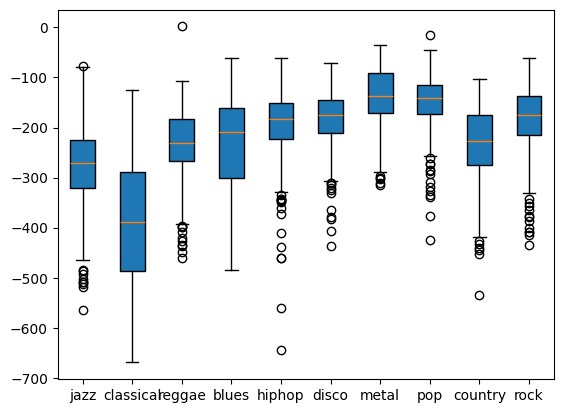

In [88]:
plt.boxplot(mfccs_dict[1], patch_artist=True)
plt.xticks([i for i in range(1, len(genres)+1)], genres)

([<matplotlib.axis.XTick at 0x12e7694d0>,
 [Text(1, 0, 'jazz'),
  Text(2, 0, 'classical'),
  Text(3, 0, 'reggae'),
  Text(4, 0, 'blues'),
  Text(5, 0, 'hiphop'),
  Text(6, 0, 'disco'),
  Text(7, 0, 'metal'),
  Text(8, 0, 'pop'),
  Text(9, 0, 'country'),
  Text(10, 0, 'rock')])

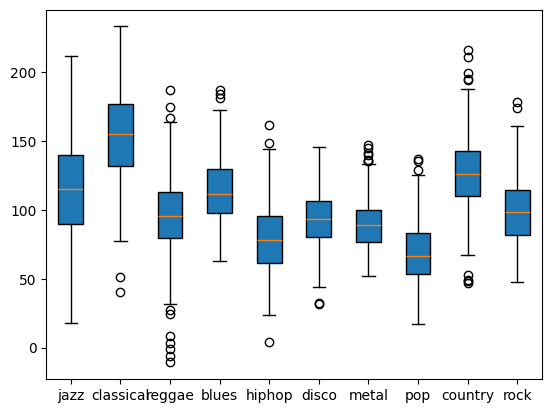

In [89]:
plt.boxplot(mfccs_dict[2], patch_artist=True)
plt.xticks([i for i in range(1, len(genres)+1)], genres)

([<matplotlib.axis.XTick at 0x12d9f1cd0>,
 [Text(1, 0, 'jazz'),
  Text(2, 0, 'classical'),
  Text(3, 0, 'reggae'),
  Text(4, 0, 'blues'),
  Text(5, 0, 'hiphop'),
  Text(6, 0, 'disco'),
  Text(7, 0, 'metal'),
  Text(8, 0, 'pop'),
  Text(9, 0, 'country'),
  Text(10, 0, 'rock')])

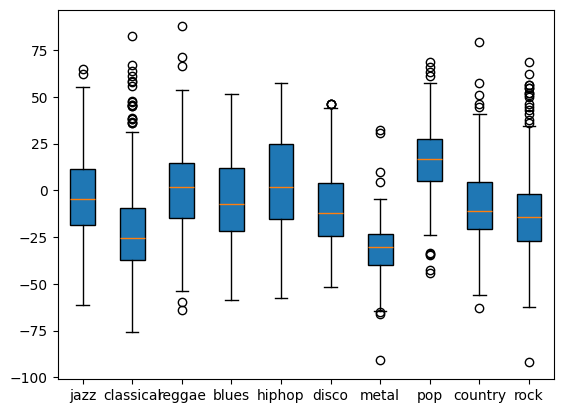

In [90]:
plt.boxplot(mfccs_dict[3], patch_artist=True)
plt.xticks([i for i in range(1, len(genres)+1)], genres)

([<matplotlib.axis.XTick at 0x12c8524d0>,
 [Text(1, 0, 'jazz'),
  Text(2, 0, 'classical'),
  Text(3, 0, 'reggae'),
  Text(4, 0, 'blues'),
  Text(5, 0, 'hiphop'),
  Text(6, 0, 'disco'),
  Text(7, 0, 'metal'),
  Text(8, 0, 'pop'),
  Text(9, 0, 'country'),
  Text(10, 0, 'rock')])

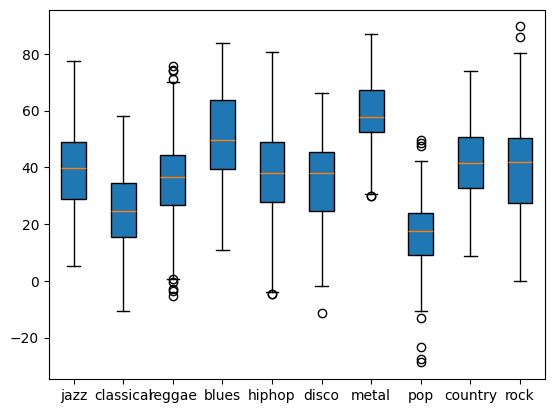

In [91]:
plt.boxplot(mfccs_dict[4], patch_artist=True)
plt.xticks([i for i in range(1, len(genres)+1)], genres)

([<matplotlib.axis.XTick at 0x12ce6e450>,
 [Text(1, 0, 'jazz'),
  Text(2, 0, 'classical'),
  Text(3, 0, 'reggae'),
  Text(4, 0, 'blues'),
  Text(5, 0, 'hiphop'),
  Text(6, 0, 'disco'),
  Text(7, 0, 'metal'),
  Text(8, 0, 'pop'),
  Text(9, 0, 'country'),
  Text(10, 0, 'rock')])

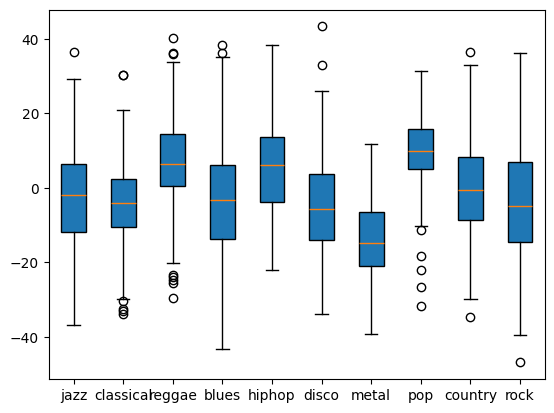

In [92]:
plt.boxplot(mfccs_dict[5], patch_artist=True)
plt.xticks([i for i in range(1, len(genres)+1)], genres)

([<matplotlib.axis.XTick at 0x12d205150>,
 [Text(1, 0, 'jazz'),
  Text(2, 0, 'classical'),
  Text(3, 0, 'reggae'),
  Text(4, 0, 'blues'),
  Text(5, 0, 'hiphop'),
  Text(6, 0, 'disco'),
  Text(7, 0, 'metal'),
  Text(8, 0, 'pop'),
  Text(9, 0, 'country'),
  Text(10, 0, 'rock')])

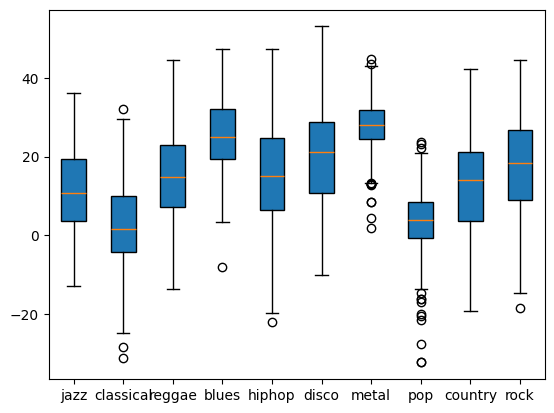

In [93]:
plt.boxplot(mfccs_dict[6], patch_artist=True)
plt.xticks([i for i in range(1, len(genres)+1)], genres)

([<matplotlib.axis.XTick at 0x12d99dfd0>,
 [Text(1, 0, 'jazz'),
  Text(2, 0, 'classical'),
  Text(3, 0, 'reggae'),
  Text(4, 0, 'blues'),
  Text(5, 0, 'hiphop'),
  Text(6, 0, 'disco'),
  Text(7, 0, 'metal'),
  Text(8, 0, 'pop'),
  Text(9, 0, 'country'),
  Text(10, 0, 'rock')])

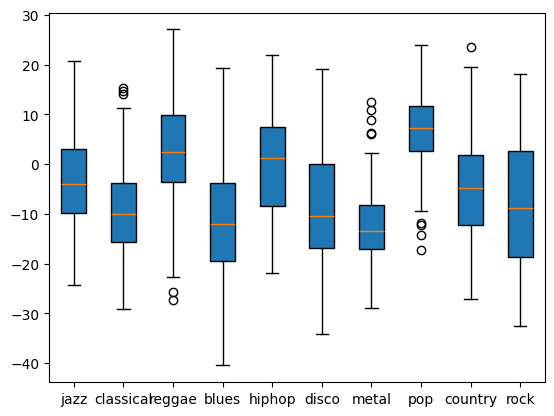

In [94]:
plt.boxplot(mfccs_dict[7], patch_artist=True)
plt.xticks([i for i in range(1, len(genres)+1)], genres)

([<matplotlib.axis.XTick at 0x12de4c2d0>,
 [Text(1, 0, 'jazz'),
  Text(2, 0, 'classical'),
  Text(3, 0, 'reggae'),
  Text(4, 0, 'blues'),
  Text(5, 0, 'hiphop'),
  Text(6, 0, 'disco'),
  Text(7, 0, 'metal'),
  Text(8, 0, 'pop'),
  Text(9, 0, 'country'),
  Text(10, 0, 'rock')])

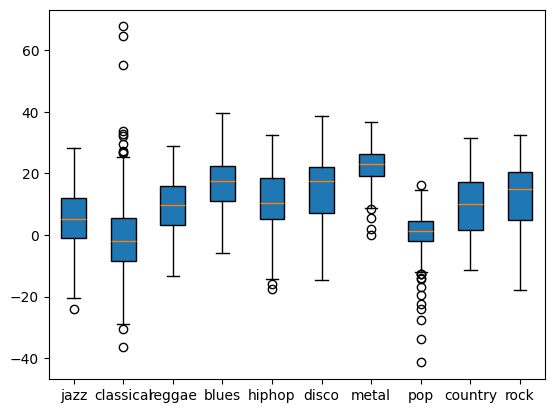

In [95]:
plt.boxplot(mfccs_dict[8], patch_artist=True)
plt.xticks([i for i in range(1, len(genres)+1)], genres)

([<matplotlib.axis.XTick at 0x12df45010>,
 [Text(1, 0, 'jazz'),
  Text(2, 0, 'classical'),
  Text(3, 0, 'reggae'),
  Text(4, 0, 'blues'),
  Text(5, 0, 'hiphop'),
  Text(6, 0, 'disco'),
  Text(7, 0, 'metal'),
  Text(8, 0, 'pop'),
  Text(9, 0, 'country'),
  Text(10, 0, 'rock')])

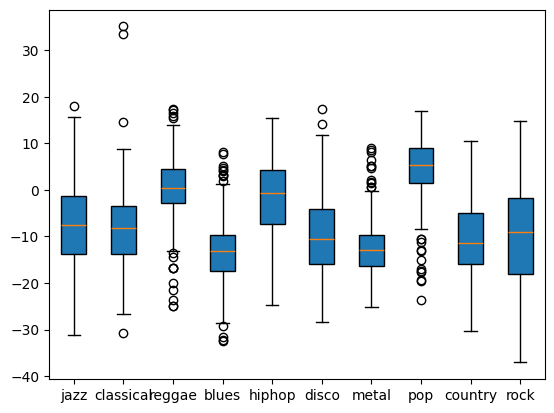

In [96]:
plt.boxplot(mfccs_dict[9], patch_artist=True)
plt.xticks([i for i in range(1, len(genres)+1)], genres)

([<matplotlib.axis.XTick at 0x12d852e90>,
 [Text(1, 0, 'jazz'),
  Text(2, 0, 'classical'),
  Text(3, 0, 'reggae'),
  Text(4, 0, 'blues'),
  Text(5, 0, 'hiphop'),
  Text(6, 0, 'disco'),
  Text(7, 0, 'metal'),
  Text(8, 0, 'pop'),
  Text(9, 0, 'country'),
  Text(10, 0, 'rock')])

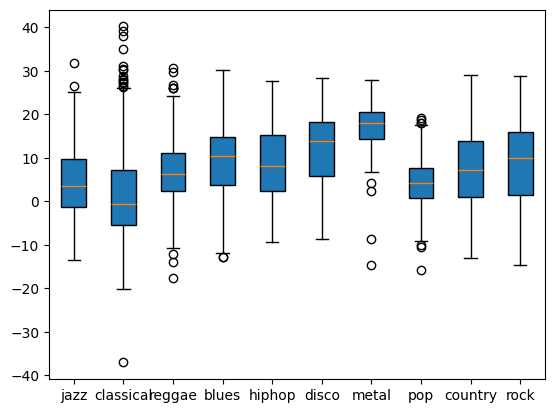

In [97]:
plt.boxplot(mfccs_dict[10], patch_artist=True)
plt.xticks([i for i in range(1, len(genres)+1)], genres)